In [1]:
import pandas as pd
df = pd.read_csv("mental_health_data final data.csv")
print(df.shape)
print(df.columns)

(50000, 17)
Index(['User_ID', 'Age', 'Gender', 'Occupation', 'Country',
       'Mental_Health_Condition', 'Severity', 'Consultation_History',
       'Stress_Level', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours',
       'Social_Media_Usage', 'Diet_Quality', 'Smoking_Habit',
       'Alcohol_Consumption', 'Medication_Usage'],
      dtype='object')


In [2]:
df.dtypes

User_ID                      int64
Age                          int64
Gender                      object
Occupation                  object
Country                     object
Mental_Health_Condition     object
Severity                    object
Consultation_History        object
Stress_Level                object
Sleep_Hours                float64
Work_Hours                   int64
Physical_Activity_Hours      int64
Social_Media_Usage         float64
Diet_Quality                object
Smoking_Habit               object
Alcohol_Consumption         object
Medication_Usage            object
dtype: object

In [3]:
df['Age'].unique()


array([36, 48, 18, 30, 58, 34, 24, 63, 53, 43, 45, 54, 64, 49, 41, 65, 56,
       27, 52, 31, 57, 50, 26, 20, 59, 22, 47, 55, 44, 38, 32, 46, 21, 19,
       42, 62, 28, 61, 35, 40, 37, 25, 60, 33, 51, 39, 23, 29])

In [4]:
print(df['Age'].max())
print(df['Age'].min())

65
18


In [5]:
df['Severity'].unique()

array([nan, 'Low', 'Medium', 'High'], dtype=object)

In [6]:

df['Stress_Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [7]:
df['Work_Hours'].unique()

array([46, 74, 77, 57, 45, 35, 62, 66, 37, 56, 47, 42, 40, 49, 68, 52, 73,
       43, 31, 30, 39, 78, 54, 51, 75, 36, 79, 60, 59, 69, 64, 48, 65, 53,
       58, 32, 44, 61, 55, 71, 80, 34, 33, 38, 50, 67, 72, 63, 41, 76, 70])

In [8]:
df['Physical_Activity_Hours'].unique()

array([ 8,  2,  9,  4, 10,  3,  7,  1,  0,  6,  5])

In [9]:
df['Sleep_Hours'].unique()

array([ 7.6,  6.8,  7.1,  6.9,  4.7,  5.1,  7.3,  4.8,  9. ,  5.9,  4. ,
        5. ,  5.3,  6.6,  7.4,  9.7,  9.1,  9.3,  7.2,  7. ,  8.1,  6.7,
        5.4,  4.2,  8.6,  4.9,  4.1,  4.4,  4.6,  5.8,  5.7,  6.2,  8.7,
        4.5,  6.5,  8.4,  9.4,  5.2,  6.3,  6. ,  9.9,  9.2,  8.8,  8.3,
        7.8,  4.3,  5.6,  7.7,  7.9,  6.4, 10. ,  7.5,  9.6,  8.5,  8.9,
        9.5,  9.8,  5.5,  8. ,  8.2,  6.1])

In [10]:
df['Diet_Quality'].unique()

array(['Healthy', 'Unhealthy', 'Average'], dtype=object)

In [11]:
df['Social_Media_Usage'].unique()

array([2.2, 3.4, 5.9, 5.4, 3.3, 3.6, 6. , 5.1, 5.7, 5.5, 1.3, 1.6, 2.7,
       3.7, 1.4, 3.9, 4.4, 4.2, 3. , 4.1, 5.2, 0.7, 4. , 0.6, 4.6, 5.6,
       2.8, 0.8, 2.4, 4.5, 4.3, 1.8, 2.9, 2.6, 4.8, 5. , 2.3, 0.9, 2.1,
       4.9, 1. , 5.8, 1.1, 5.3, 2.5, 2. , 1.5, 1.2, 4.7, 3.8, 1.7, 3.5,
       3.1, 0.5, 3.2, 1.9])

In [57]:
df.isnull().sum()

User_ID                        0
Age                            0
Gender                         0
Occupation                     0
Country                        0
Mental_Health_Condition        0
Severity                   25002
Consultation_History           0
Stress_Level                   0
Sleep_Hours                    0
Work_Hours                     0
Physical_Activity_Hours        0
Social_Media_Usage             0
Diet_Quality                   0
Smoking_Habit                  0
Alcohol_Consumption            0
Medication_Usage               0
dtype: int64

In [12]:
null_percentage = df['Severity'].isnull().mean() * 100
print(f"Percentage of nulls in 'Severity': {null_percentage:.2f}%")


Percentage of nulls in 'Severity': 50.00%


In [13]:
df['Severity'] = df['Severity'].fillna('Unknown')


In [14]:
df.isnull().sum()

User_ID                    0
Age                        0
Gender                     0
Occupation                 0
Country                    0
Mental_Health_Condition    0
Severity                   0
Consultation_History       0
Stress_Level               0
Sleep_Hours                0
Work_Hours                 0
Physical_Activity_Hours    0
Social_Media_Usage         0
Diet_Quality               0
Smoking_Habit              0
Alcohol_Consumption        0
Medication_Usage           0
dtype: int64

In [15]:
#Define target and features
y = df['Stress_Level']  # Target variable
X = df[['Work_Hours', 'Sleep_Hours', 'Physical_Activity_Hours',
        'Diet_Quality', 'Social_Media_Usage', 'Smoking_Habit', 'Alcohol_Consumption']]


In [16]:
#Encode Categorical Features
X = pd.get_dummies(X, columns=['Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption'], drop_first=True)


In [22]:
#Using copy to avoid warnings and ensuring working with a clean independent object.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Using copy to avoid warnings and ensuring working with a clean independent object.
X = X.copy()
X[['Work_Hours', 'Sleep_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']] = scaler.fit_transform(
    X[['Work_Hours', 'Sleep_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']]
)



In [26]:
#ONLY TRAIN SET!!!
#Normalize continuous features #Only train set (This ensures that the test data is scaled using the same parameters (mean and std) learned from the training data.)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming your full feature set is in X and target in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scaler
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train[['Work_Hours', 'Sleep_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['Work_Hours', 'Sleep_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage'], index=X_train.index)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test[['Work_Hours', 'Sleep_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['Work_Hours', 'Sleep_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage'], index=X_test.index)


In [ ]:
#Create interaction features

X['Work_Sleep_Ratio'] = df['Work_Hours'] / (df['Sleep_Hours'] + 1)
X['Activity_Social_Balance'] = df['Physical_Activity_Hours'] - df['Social_Media_Usage']


X['Work_Sleep_Ratio'] = df['Work_Hours'] / (df['Sleep_Hours'] + 1)
What it means:

You're calculating how many hours someone works relative to how much they sleep.
Adding +1 to Sleep_Hours prevents division by zero and smooths the ratio.

Why it's useful:
A high ratio might indicate someone is overworked or sleep-deprived.
A low ratio could suggest a more balanced lifestyle.
This feature could correlate with stress, productivity, or health outcomes.


X['Activity_Social_Balance'] = df['Physical_Activity_Hours'] - df['Social_Media_Usage']
What it means:
You're measuring the net time spent on physical activity vs. social media.
Positive values: more active than online.
Negative values: more time on social media than being physically active.

Why it's useful:
This balance might reflect lifestyle quality, mental health, or energy levels.
It could be predictive of outcomes like mood, fitness, or even sleep quality.

In [27]:
#Split data for modeling

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
print(y_train.unique())
print(len(y_train.unique()))


['High' 'Medium' 'Low']
3


In [32]:
#Implementation (Classification example)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

#AUC!!


              precision    recall  f1-score   support

        High       0.34      0.34      0.34      3406
         Low       0.33      0.32      0.32      3280
      Medium       0.33      0.34      0.34      3314

    accuracy                           0.33     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       0.33      0.33      0.33     10000



In [41]:
#Categorical features are label-encoded.
#Continuous features are scaled.
#Model is trained and evaluated with AUC.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# Define target and features
y = df['Stress_Level']
X = df[['Work_Hours', 'Sleep_Hours', 'Physical_Activity_Hours',
        'Diet_Quality', 'Social_Media_Usage', 'Smoking_Habit', 'Alcohol_Consumption']]

# Encode categorical features
X_encoded = X.copy()
categorical_cols = ['Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le  # Save encoder if needed later

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale continuous features
scaler = StandardScaler()
cols_to_scale = ['Work_Hours', 'Sleep_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']

X_train_scaled = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled = scaler.transform(X_test[cols_to_scale])

# Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=cols_to_scale, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=cols_to_scale, index=X_test.index)

# Replace original columns with scaled ones
X_train_final = X_train.copy()
X_test_final = X_test.copy()

X_train_final[cols_to_scale] = X_train_scaled
X_test_final[cols_to_scale] = X_test_scaled

# Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_final, y_train)

# Predict class labels
y_pred = model.predict(X_test_final)

# Predict class probabilities
y_proba = model.predict_proba(X_test_final)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Compute multiclass AUC
auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
print(f"AUC Score (multiclass, macro-average): {auc:.4f}")


Classification Report:

              precision    recall  f1-score   support

        High       0.34      0.34      0.34      3406
         Low       0.33      0.32      0.32      3280
      Medium       0.32      0.33      0.33      3314

    accuracy                           0.33     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       0.33      0.33      0.33     10000

AUC Score (multiclass, macro-average): 0.5004


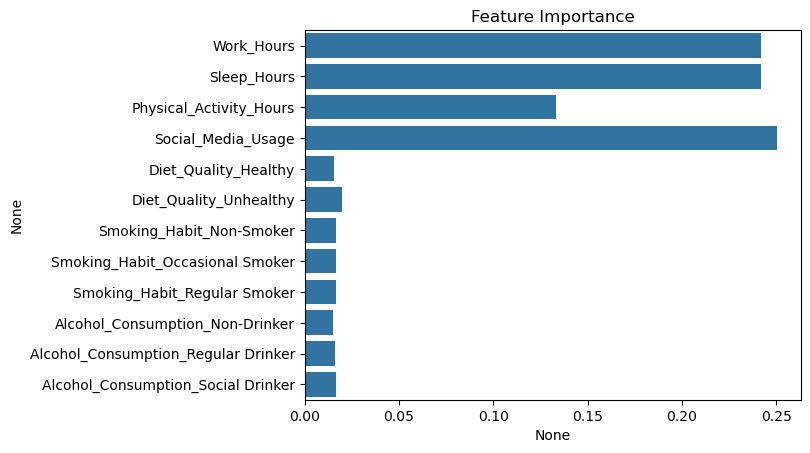

In [75]:
#Feature importance
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance")
plt.show()


In [ ]:
features = [
    'Work_Hours',
    'Sleep_Hours',
    'Physical_Activity_Hours',
    'Diet_Quality',
    'Social_Media_Usage'
]

X = df[features]
y = df['Stress_Level']


In [ ]:
X = pd.get_dummies(X, columns=['Diet_Quality'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

        High       0.33      0.34      0.34      3342
         Low       0.33      0.31      0.32      3289
      Medium       0.34      0.34      0.34      3369

    accuracy                           0.33     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       0.33      0.33      0.33     10000



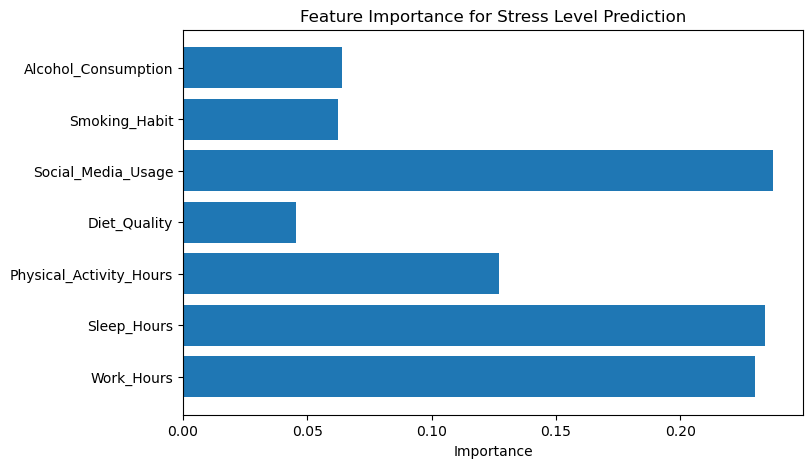

In [42]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = X.columns
importances = model.feature_importances_

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.title('Feature Importance for Stress Level Prediction')
plt.xlabel('Importance')
plt.show()


In [ ]:
#To improve model
# Convert 'Stress_Level' to binary: 1 for High stress, 0 for Low or Medium
# df['Stress_Binary'] = df['Stress_Level'].apply(lambda x: 1 if x == 'High' else 0)



In [44]:
#Select features
features = [
    'Age',
    'Gender',
    'Occupation',
    'Mental_Health_Condition',
    'Severity',
    'Consultation_History',
    'Sleep_Hours',
    'Work_Hours',
    'Physical_Activity_Hours',
    'Social_Media_Usage',
    'Diet_Quality',
    'Smoking_Habit',
    'Alcohol_Consumption',
    'Medication_Usage'
]

X = df[features]
y = df['Stress_Level']


In [45]:
#Encode categorical Features

X_encoded = pd.get_dummies(X, drop_first=True)


In [46]:
#Train-test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [47]:
#Train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [48]:
# Evaluate Performance
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.34      0.36      0.35      3406
         Low       0.32      0.30      0.31      3280
      Medium       0.33      0.33      0.33      3314

    accuracy                           0.33     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       0.33      0.33      0.33     10000



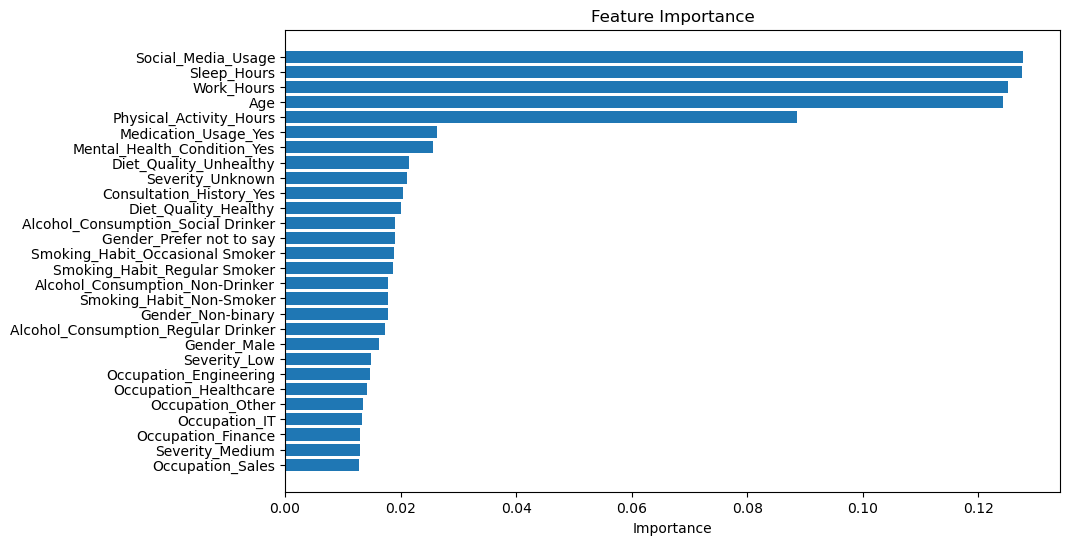

In [49]:
#Feature Importance
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X_encoded.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


The model is heavily biased toward predicting “Not High Stress” (class 0) which explains the high accuracy. But it fails to identify high-stress individuals, which is what we are trying to identify.

Reason: 
We have 6594 samples of class 0 and only 3406 of class 1 so the model learns to play it safe by mostly predicting the majority class.

To avoid this we will use weights.


In [50]:
X = df[[
    'Gender', 'Occupation', 'Mental_Health_Condition', 'Severity',
    'Consultation_History', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours',
    'Social_Media_Usage', 'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption',
    'Medication_Usage'
]]
y = df['Stress_Level']

X_encoded = pd.get_dummies(X, drop_first=True)


removed Age as it is a continuous value.

Could be included after scaling like this:

X = df[[
    'Gender', 'Occupation', 'Mental_Health_Condition', 'Severity',
    'Consultation_History', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours',
    'Social_Media_Usage', 'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption',
    'Medication_Usage'
]]
y = df['Stress_Binary']

X_encoded = pd.get_dummies(X, drop_first=True)


In [ ]:
#REMOVE
#Apply SMOTE (Synthetic Minority Oversampling)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [103]:
#Train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [104]:
#Evaluate Performance
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.84      0.76      6642
           1       0.79      0.62      0.70      6676

    accuracy                           0.73     13318
   macro avg       0.74      0.73      0.73     13318
weighted avg       0.74      0.73      0.73     13318



In [106]:
#Logistic regression
#Replace unknown with 0
df['Severity'] = df['Severity'].replace('unknown', 0)

df['Severity'] = df['Severity'].replace('unknown', 0).fillna(0)


In [107]:
#Encode as ordinal
severity_map = {'low': 1, 'moderate': 2, 'high': 3, 0: 0}
df['Severity'] = df['Severity'].map(severity_map)


Logistic Regression needs numeric or properly encoded categorical values, "unknown" as a string will break the model or be misinterpreted.

Replacing it with 0 lets us treat it as “no severity info,” which can still be meaningful.

In [52]:
#Define Features and Target
X = df[[
    'Gender', 'Occupation', 'Mental_Health_Condition', 'Severity',
    'Consultation_History', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours',
    'Social_Media_Usage', 'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption',
    'Medication_Usage'
]]
y = df['Stress_Level']


In [53]:
#Encode Categorical Features
X_encoded = pd.get_dummies(X, drop_first=True)


In [54]:
print(X_encoded.isnull().sum())  # See which columns have missing values
print(np.isinf(X_encoded).sum()) # Check for infinite values


Sleep_Hours                            0
Work_Hours                             0
Physical_Activity_Hours                0
Social_Media_Usage                     0
Gender_Male                            0
Gender_Non-binary                      0
Gender_Prefer not to say               0
Occupation_Engineering                 0
Occupation_Finance                     0
Occupation_Healthcare                  0
Occupation_IT                          0
Occupation_Other                       0
Occupation_Sales                       0
Mental_Health_Condition_Yes            0
Severity_Low                           0
Severity_Medium                        0
Severity_Unknown                       0
Consultation_History_Yes               0
Diet_Quality_Healthy                   0
Diet_Quality_Unhealthy                 0
Smoking_Habit_Non-Smoker               0
Smoking_Habit_Occasional Smoker        0
Smoking_Habit_Regular Smoker           0
Alcohol_Consumption_Non-Drinker        0
Alcohol_Consumpt

In [55]:
X_encoded = X_encoded.fillna(0)



In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [57]:
#Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)



In [58]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [59]:
#Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [60]:
#Evaluate model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.34      0.32      0.33      3406
         Low       0.32      0.33      0.33      3280
      Medium       0.32      0.33      0.33      3314

    accuracy                           0.33     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       0.33      0.33      0.33     10000

[[1085 1146 1175]
 [1073 1086 1121]
 [1068 1151 1095]]


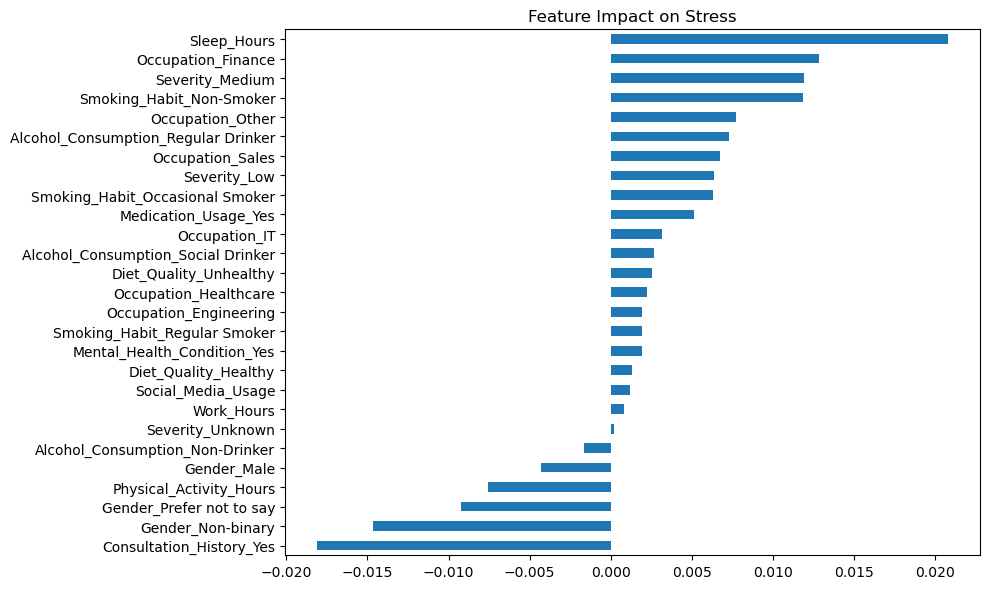

In [61]:
#Interpret Feature impact
import pandas as pd
import matplotlib.pyplot as plt

coefficients = pd.Series(model.coef_[0], index=X_encoded.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10, 6), title='Feature Impact on Stress')
plt.tight_layout()
plt.show()
